In [21]:
import numpy as np
import astropy.units as u
import scipy 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [22]:
msol_to_kg = 1.989e30
au_to_m = 1.496e11
s_to_day = 86400

G = 6.7e-11
G *= s_to_day**2

Mstar = 1
Mp = 9.543e-4
xp = 5.2 
r = .11
e = 0.2

Mstar *= msol_to_kg
Mp *= msol_to_kg
xp *= au_to_m
r *= au_to_m

In [23]:
def acc_x(x, y, xdot, ydot):
    delta = np.sqrt(x**2 + y**2)
    return 2*Omega*ydot + ((3*Omega**2) - (G*Mp) / delta**3)*x

def acc_y(x, y, xdot, ydot):
    delta = np.sqrt(x**2 + y**2)
    return -2*Omega*xdot - ((G*Mp) / delta**3)*y

In [24]:
T = 2 * np.pi * np.sqrt(r**3 / (G * Mp))
print("Period (days):",T)

Period (days): 430.4822897612186


With a period $\sim2\times10^3$ days, we should be good with a timestep of 1 day.

In [25]:
M0 = Mstar

def Msol_loss(M0, t):
    power = (-t)/(100000)
    return M0 * np.e**(power)

In [27]:
dt = .05
days = 100000
steps = int(days/dt)
t = np.linspace(0, days, steps)

r0 = r*(1-e*e)/(1+e)

x = r0
y = 0
xdot = 0
ydot = np.sqrt(G*Mp*(2/r0-1/r))

inc = 0

x_vals = np.zeros(steps)
y_vals = np.zeros(steps)
xdot_vals = np.zeros(steps)
ydot_vals = np.zeros(steps)
Mstar_vals = np.zeros(steps)

# This while loop draws heavily from 
# https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/ast119_w15/class-11#TOC-Solving-for-Orbital-Motion-on-a-Computer:-The-Leapfrog-Method

while (inc < steps):
    Mstar_vals[inc] = Mstar
    x_vals[inc] = x
    y_vals[inc] = y    
    xdot_vals[inc] = xdot
    ydot_vals[inc] = ydot
    
    Mstar = Msol_loss(M0, t[inc])
    Omega = G*Mstar / xp**3
    
    xdot += dt*acc_x(x, y, xdot, ydot)
    ydot += dt*acc_y(x, y, xdot, ydot)
    
    x += dt*xdot
    y += dt*ydot
    
    inc += 1

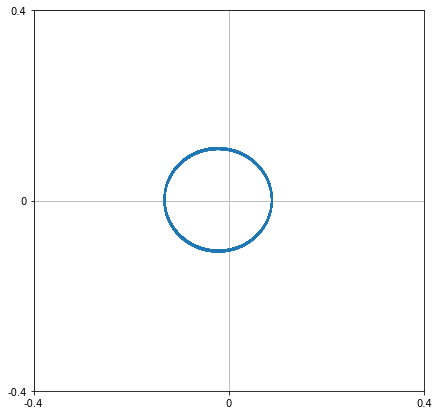

In [28]:
orbit, orbplt = plt.subplots(figsize=(7,7))

x = x_vals/au_to_m
y = y_vals/au_to_m

orbplt.plot(x,y)
#orbplt.set_xlim(-.4,.4)
#orbplt.set_ylim(-.4,.4)
orbplt.set_xticks([-.4,0,.4])
orbplt.set_yticks([-.4,0,.4])
orbplt.set_xticklabels([-0.40,0,0.40])
orbplt.set_yticklabels([-0.40,0,0.40])
orbplt.grid(b=True,which='major', axis='both')

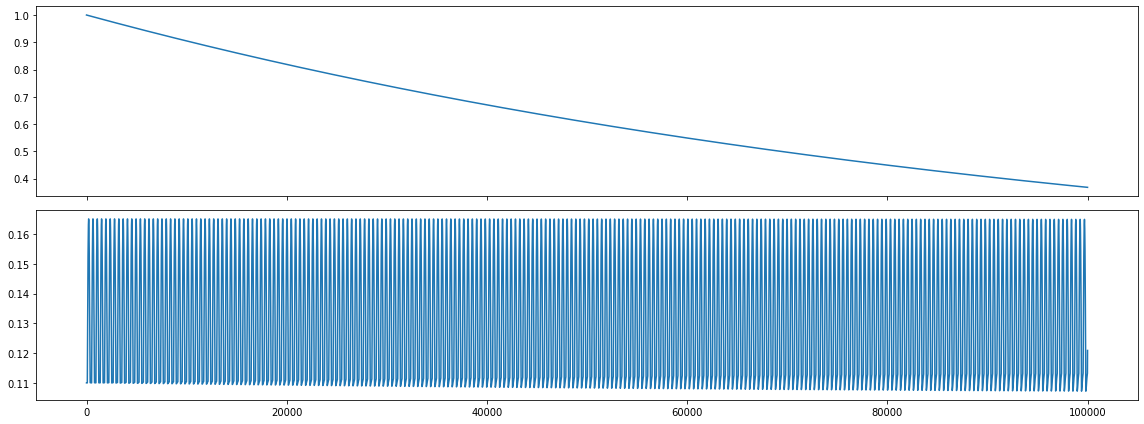

In [29]:
radiuses = np.sqrt(x**2 + y**2)
thetas = np.arctan(y/x)

semimajor = (radiuses * (1 + e * np.cos(thetas)))/(1 - e**2)

masses = Mstar_vals/msol_to_kg

changes, ax = plt.subplots(2, figsize=(16,6), sharex=True)

ax[0].plot(t,masses)
ax[1].plot(t,semimajor)
#ax.set_ylim(0.39,0.41)

changes.tight_layout()

## Same thing, with acceleration from Yarkovsky

In [18]:
msol_to_kg = 1.989e30
au_to_m = 1.496e11
s_to_day = 86400

G = 6.7e-11
G *= s_to_day**2

M0 = 1
Mp = 9.543e-4
xp = 5.2 
r = .33

M0 *= msol_to_kg
Mp *= msol_to_kg
xp *= au_to_m
r *= au_to_m

In [12]:
Lstar = 3.828e26 #luminosity of the Sun
Lstar *= s_to_day #converts to Joules/day
c = 2.998e8 #speed of sound
c *= s_to_day
D = 10000 #diameter of moon (m)
roh = 4000 #density of moon (kg/m^3)
zeta = 1 #efficiency factor???

In [13]:
def acc_wyar_x(x, y, xdot, ydot):
    delta = np.sqrt(x**2 + y**2)
    
    return 2*Omega*ydot + x*((3*Omega**2) - (G*Mp) / delta**3) + A*r**(-3/2)*y*(1 - (3*x)/r)

def acc_wyar_y(x, y, xdot, ydot):
    delta = np.sqrt(x**2 + y**2)
    
    return -2*Omega*xdot - y*((G*Mp) / delta**3) + A*(1/np.sqrt(r) - 3*(x**2)*(r**(-5/2)) - 2*x*(r**(-3/2)))

def A_L(L):
    return zeta * 3/(8*np.pi) * 1/(D*roh) * L/c

In [14]:
def Msol_loss(M0, t):
    power = (-t)/(100000)
    return M0 * np.e**(power)

In [15]:
dt = .5
days = 100000
steps = 2*days
t = np.linspace(0, days, steps)

r0 = r*(1-e*e)/(1+e)

x = r0
y = 0
xdot = 0
ydot = np.sqrt(G*Mp*(2/r0-1/r))

inc = 0

x_vals = np.zeros(steps)
y_vals = np.zeros(steps)
xdot_vals = np.zeros(steps)
ydot_vals = np.zeros(steps)
Mstar_vals = np.zeros(steps)
Lstar_vals = np.zeros(steps)

# This while loop draws heavily from 
# https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/ast119_w15/class-11#TOC-Solving-for-Orbital-Motion-on-a-Computer:-The-Leapfrog-Method

while (inc < steps):
    Mstar_vals[inc] = Mstar
    Lstar_vals[inc] = Lstar
    x_vals[inc] = x
    y_vals[inc] = y    
    xdot_vals[inc] = xdot
    ydot_vals[inc] = ydot
    
    Mstar = Msol_loss(M0,t[inc])
    Lstar = Lstar*(Mstar/M0)**3.5
    A = A_L(Lstar)
    Omega = G*Mstar / xp**3
    
    xdot += dt*acc_wyar_x(x, y, xdot, ydot)
    ydot += dt*acc_wyar_y(x, y, xdot, ydot)
    
    x += dt*xdot
    y += dt*ydot
    
    inc += 1

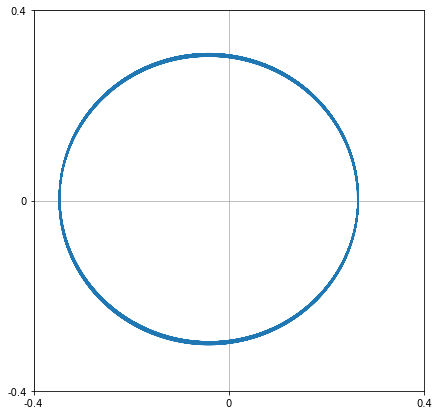

In [16]:
orbit, orbplt = plt.subplots(figsize=(7,7))

x = x_vals/au_to_m
y = y_vals/au_to_m

orbplt.plot(x,y)
#orbplt.set_xlim(-.4,.4)
#orbplt.set_ylim(-.4,.4)
orbplt.set_xticks([-.4,0,.4])
orbplt.set_yticks([-.4,0,.4])
orbplt.set_xticklabels([-0.40,0,0.40])
orbplt.set_yticklabels([-0.40,0,0.40])
orbplt.grid(b=True,which='major', axis='both')

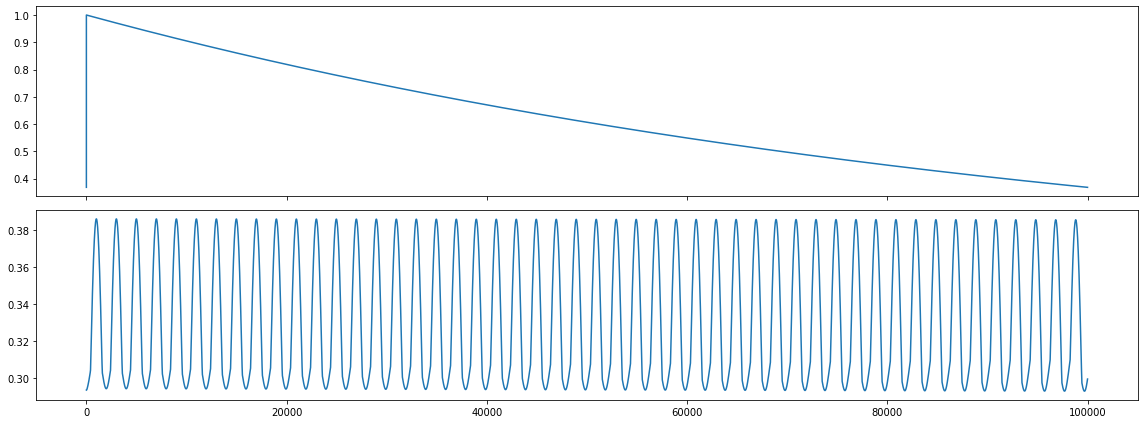

In [19]:
radiuses = np.sqrt(x**2 + y**2)
thetas = np.arctan(y/x)

semimajor = (radiuses * (1 + e * np.cos(thetas)))/(1 - e**2)

masses = Mstar_vals/msol_to_kg

changes, ax = plt.subplots(2, figsize=(16,6), sharex=True)

ax[0].plot(t,masses)
ax[1].plot(t,semimajor)
#ax.set_ylim(0.39,0.41)

changes.tight_layout()